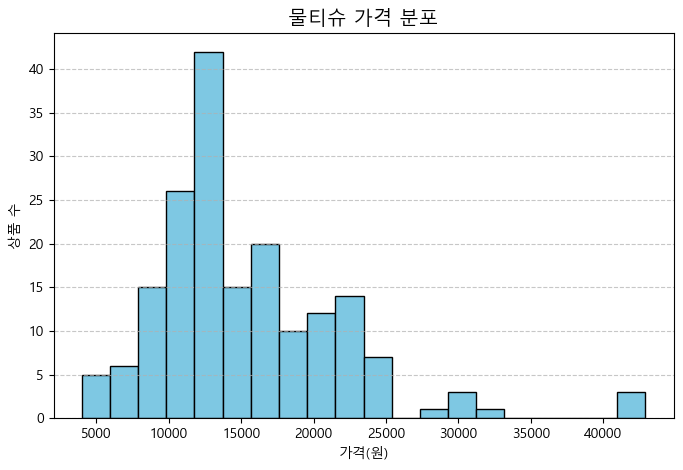

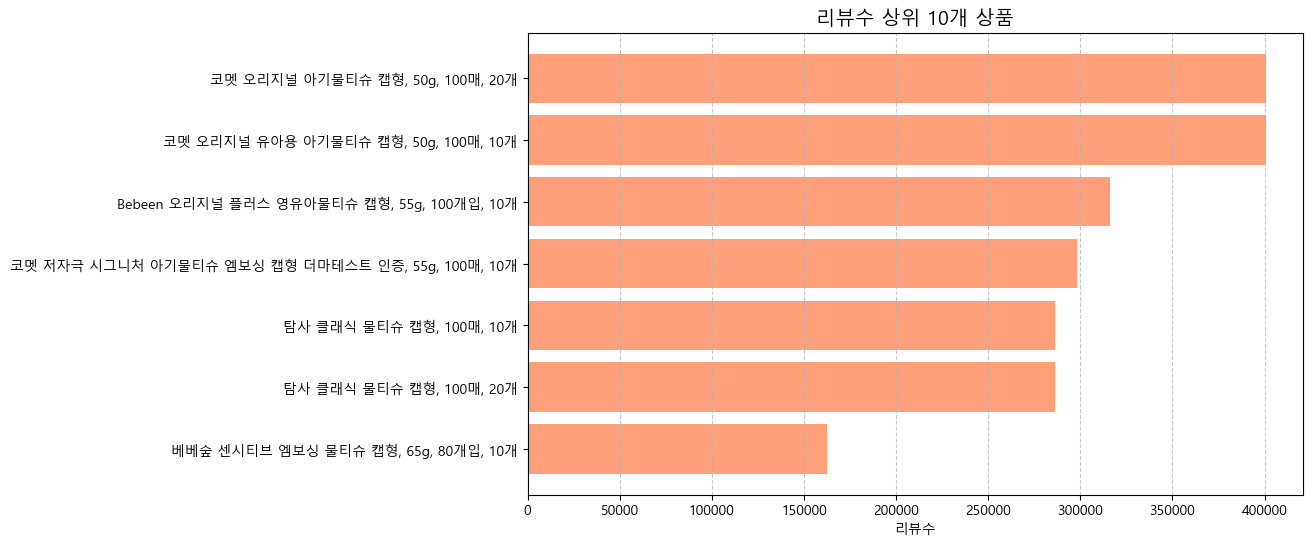

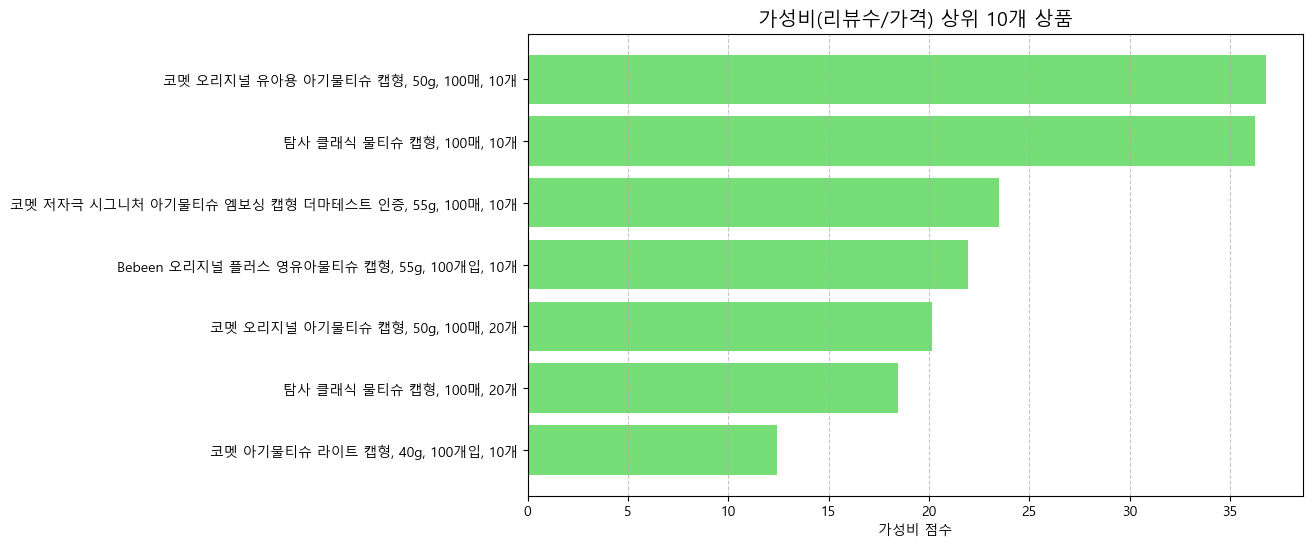

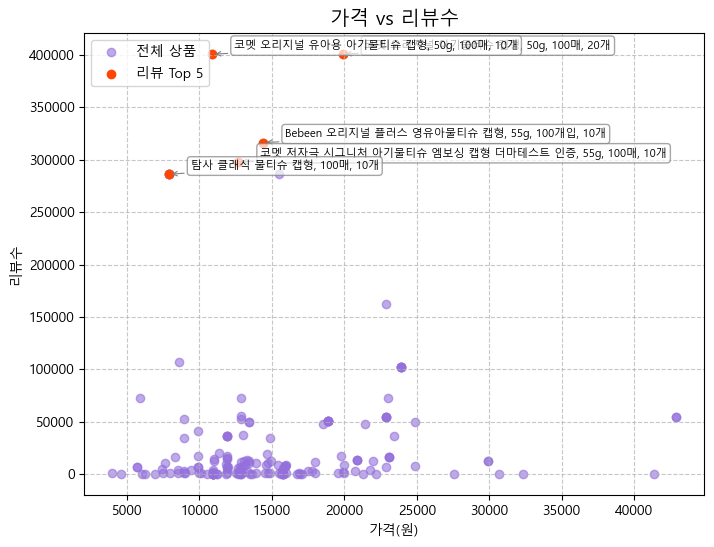

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import os

# ===== 한글 폰트 설정 =====
if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")
elif platform.system() == "Darwin":  # Mac
    plt.rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# ===== CSV 불러오기 =====
df = pd.read_csv("coupang_wet_tissue_rank36_pages1to5.csv")
df["가격(원)"] = df["가격"].str.replace("원", "").str.replace(",", "").astype(int)
df["리뷰수"] = df["리뷰수"].astype(int)
df["가성비점수"] = df["리뷰수"] / df["가격(원)"]

# ===== 저장 폴더 생성 =====
save_dir = "images"
os.makedirs(save_dir, exist_ok=True)  # 폴더 없으면 자동 생성

# 1. 가격 분포
plt.figure(figsize=(8,5))
plt.hist(df["가격(원)"], bins=20, color="#7EC8E3", edgecolor="black")
plt.title("물티슈 가격 분포", fontsize=14)
plt.xlabel("가격(원)")
plt.ylabel("상품 수")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(save_dir, "price_distribution.png"), dpi=300, bbox_inches="tight")
plt.show()

# 2. 리뷰수 TOP 10
top10 = df.sort_values(by="리뷰수", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["제품명"], top10["리뷰수"], color="#FFA07A")
plt.title("리뷰수 상위 10개 상품", fontsize=14)
plt.xlabel("리뷰수")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(save_dir, "top10_reviews.png"), dpi=300, bbox_inches="tight")
plt.show()

# 3. 가성비 TOP 10
value_top10 = df.sort_values(by="가성비점수", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(value_top10["제품명"], value_top10["가성비점수"], color="#77DD77")
plt.title("가성비(리뷰수/가격) 상위 10개 상품", fontsize=14)
plt.xlabel("가성비 점수")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(save_dir, "top10_value.png"), dpi=300, bbox_inches="tight")
plt.show()

# 4. 가격 vs 리뷰수 산점도
plt.figure(figsize=(8,6))
plt.scatter(df["가격(원)"], df["리뷰수"], alpha=0.6, color="#9370DB", label="전체 상품")

# Top 5 리뷰수 상품
top5 = df.sort_values(by="리뷰수", ascending=False).head(5)
plt.scatter(top5["가격(원)"], top5["리뷰수"], color="#FF4500", label="리뷰 Top 5")

for i, row in top5.iterrows():
    plt.annotate(
        row["제품명"],
        xy=(row["가격(원)"], row["리뷰수"]),
        xytext=(row["가격(원)"]+1500, row["리뷰수"]+5000),
        arrowprops=dict(arrowstyle="->", color="gray", lw=0.8),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
        fontsize=8
    )

plt.title("가격 vs 리뷰수", fontsize=14)
plt.xlabel("가격(원)")
plt.ylabel("리뷰수")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.savefig(os.path.join(save_dir, "scatter_price_reviews.png"), dpi=300, bbox_inches="tight")
plt.show()
